In [105]:
import pandas as pd

In [106]:
Netflix_Data = pd.read_csv(r"D:\Portafolio\Fundamentos_+_EDA\Dataset\netflix_titles_nov_2019.csv")
Netflix_Data.tail(10)


,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
5827,70206824,Triumph of the Heart,Richard Michaels,"Mario Van Peebles, Susan Ruttan, Lane R. Davis...",United States,"October 1, 2011",1991,TV-PG,93 min,"Dramas, Sports Movies","This drama tells the tale of Ricky Bell, a pro...",Movie
5828,70206825,Unspeakable Acts,Linda Otto,"Jill Clayburgh, Brad Davis, Sam Behrens",United States,"October 1, 2011",1990,NR,95 min,Dramas,Laurie and Joseph are doctors who interview se...,Movie
5829,70206826,Victim of Beauty,Roger Young,"William Devane, Jeri Ryan, Michele Abrams, Nic...",United States,"October 1, 2011",1991,NR,93 min,"Dramas, Thrillers",A beauty pageant winner is stalked by a serial...,Movie
5830,60003155,Joseph: King of Dreams,"Rob LaDuca, Robert C. Ramirez","Ben Affleck, Mark Hamill, Richard Herd, Mauree...",United States,"September 27, 2011",2000,TV-PG,75 min,"Children & Family Movies, Dramas, Faith & Spir...",With his gift of dream interpretation and his ...,Movie
5831,70154110,Even the Rain,Icíar Bollaín,"Luis Tosar, Gael García Bernal, Juan Carlos Ad...","Spain, Mexico, France","May 17, 2011",2010,NR,103 min,"Dramas, International Movies",While making a film about the incursion of Chr...,Movie
5832,70141644,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,"November 1, 2010",1987,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",Movie
5833,70127998,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,"November 18, 2009",2009,TV-14,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",Movie
5834,70084180,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,"May 5, 2009",2007,NR,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,Movie
5835,70157452,Dinner for Five,NaN,NaN,United States,"February 4, 2008",2007,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",TV Show
5836,70053412,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,"January 1, 2008",2006,NR,81 min,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea...",Movie


In [107]:
print(Netflix_Data.dtypes)
Netflix_Data.shape

show_id          int64
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
type            object
dtype: object


(5837, 12)

In [108]:
Netflix_Data['type'].value_counts()

type
Movie      3939
TV Show    1898
Name: count, dtype: int64

In [109]:
peliculas = Netflix_Data[Netflix_Data['type'] == 'Movie'].size
series = Netflix_Data[Netflix_Data['type'] == 'TV Show'].size

print(f"Total de peliculas: {peliculas}\nTotal de series: {series}\nRatio: {peliculas/series}")


Total de peliculas: 47268
Total de series: 22776
Ratio: 2.0753424657534247


# 1. Contexto y estructura general
- ¿Qué representa este dataset? ¿Cuál es su propósito o contexto? El dataset representa el catalogo que tenia Netlfix el 2019. Su proposito es mostrar cuales son las caracteristicas de cada pelicula o serie presente en la aplicacion.

- ¿Cuántos títulos hay en total? Tiene 5837 títulos.

- ¿Qué tipo de variables hay? (Numéricas, categóricas, fechas, texto…) Hay de todo tipo, int y strings

- ¿Qué significan cada una de las columnas? Cada columna o feature, corresponden a caracteristicas propias de cada elemento del catalogo.

- ¿Qué proporción son películas vs series? 2.07 aproximadamente.

# 2. Limpieza y preparación

- ¿Hay valores faltantes? ¿En qué columnas y cuántos?

In [110]:
null_values_per_column = Netflix_Data.isnull().sum()
total_null_values = Netflix_Data.isnull().sum().sum()

print(null_values_per_column)
print(f"Total de valores nulos en el DataFrame: {total_null_values}")

show_id            0
title              0
director        1901
cast             556
country          427
date_added       642
release_year       0
rating            10
duration           0
listed_in          0
description        0
type               0
dtype: int64
Total de valores nulos en el DataFrame: 3536


- ¿Hay títulos duplicados?

In [111]:
dupli = Netflix_Data.duplicated(subset="title").sum()
print(f"En total hay: {dupli} titulos duplicados")	

En total hay: 57 titulos duplicados


- ¿Las fechas están en formato correcto?

In [112]:
date_added = Netflix_Data['date_added']
date_added

0       November 30, 2019
1       November 30, 2019
2       November 30, 2019
3       November 29, 2019
4                     NaN
              ...        
5832     November 1, 2010
5833    November 18, 2009
5834          May 5, 2009
5835     February 4, 2008
5836      January 1, 2008
Name: date_added, Length: 5837, dtype: object

In [113]:
release_year = Netflix_Data['release_year']
release_year

0       2019
1       2019
2       2019
3       2019
4       2019
        ... 
5832    1987
5833    2009
5834    2007
5835    2007
5836    2006
Name: release_year, Length: 5837, dtype: int64

# 3. Análisis por tipo de contenido
 - ¿Cuál es la duración promedio de las películas y series? ¿Y la mediana? ¿Hay outliers?

In [114]:
# Función que procesa la columna 'duration' y extrae la duración en minutos o temporadas
def process_duration(duration):
    if 'min' in duration:
        return int(duration.replace(' min', '')) # Convierte a entero los minutos y elimina ' min'
    elif 'Season' in duration:
        return int(duration.split(' ')[0]) # Convierte a entero las temporadas y elimina ' Season'
    else:
        return None  # Casos no contemplados

# Se aplica la funcion a la columna 'duration' y se crea una nueva columna 'processed_duration'
Netflix_Data['processed_duration'] = Netflix_Data['duration'].apply(process_duration)

# Muestra el DataFrame con la nueva columna
Netflix_Data

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,processed_duration
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show,1
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,67
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,135
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,106
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5832,70141644,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,"November 1, 2010",1987,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",Movie,84
5833,70127998,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,"November 18, 2009",2009,TV-14,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",Movie,29
5834,70084180,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,"May 5, 2009",2007,NR,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,Movie,104
5835,70157452,Dinner for Five,NaN,NaN,United States,"February 4, 2008",2007,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",TV Show,1


In [115]:
movie_duration_min = Netflix_Data[Netflix_Data['type'] == 'Movie']['processed_duration']


movie_duration_min.describe()
#print(f"La duracion promedio de las peliculas es: {movie_duration_min.mean()} minutos")
#print(f"La mediana de la duracion de las peliculas es: {movie_duration_min.median()} minutos")

count    3939.000000
mean       98.029195
std        27.719096
min         3.000000
25%        85.000000
50%        97.000000
75%       113.000000
max       312.000000
Name: processed_duration, dtype: float64

<Axes: ylabel='Frequency'>

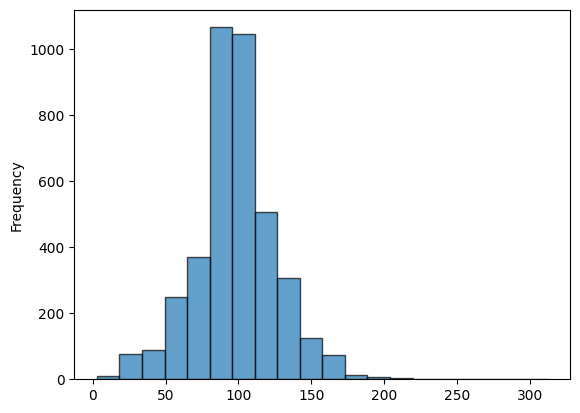

In [116]:
movie_duration_min.plot.hist(bins=20, edgecolor='black', alpha=0.7)

<Axes: title={'center': 'processed_duration'}, xlabel='type'>

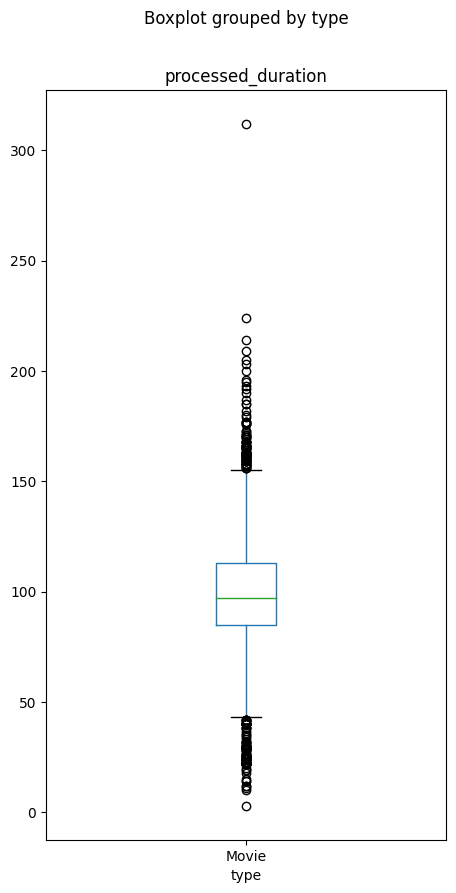

In [117]:
Netflix_Data_movies = Netflix_Data[Netflix_Data['type'] == 'Movie']
Netflix_Data_movies.boxplot(column='processed_duration', by='type', figsize=(5, 10), grid=False)

In [118]:
movie_duration_sea = Netflix_Data[Netflix_Data['type'] == 'TV Show']['processed_duration']


movie_duration_sea.describe()

count    1898.000000
mean        1.800316
std         1.644998
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        15.000000
Name: processed_duration, dtype: float64

<Axes: ylabel='Frequency'>

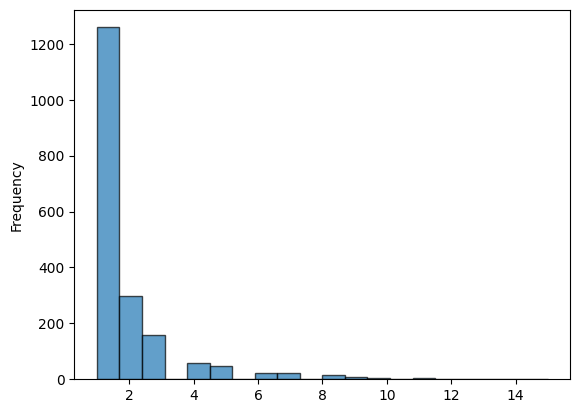

In [123]:
movie_duration_sea.plot.hist(bins=20, edgecolor='black', alpha=0.7)

<Axes: title={'center': 'processed_duration'}, xlabel='type'>

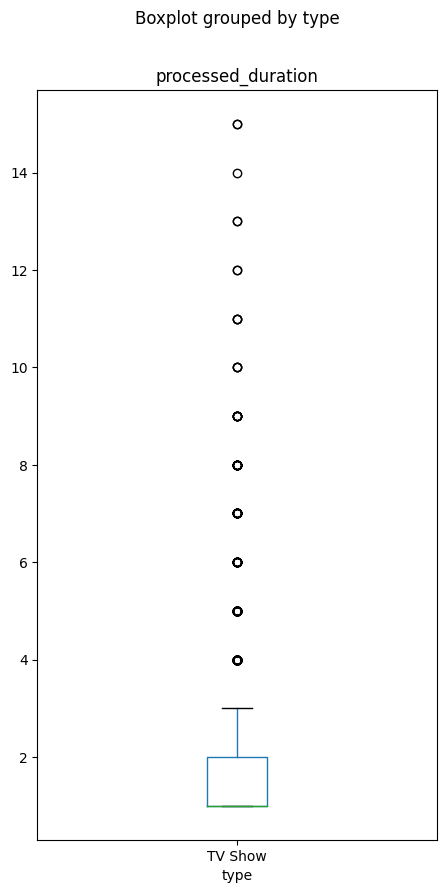

In [124]:
Netflix_Data_series = Netflix_Data[Netflix_Data['type'] == 'TV Show']
Netflix_Data_series.boxplot(column='processed_duration', by='type', figsize=(5, 10), grid=False)

- ¿Cómo ha cambiado la cantidad de contenido agregado a Netflix por año?

<Axes: xlabel='date_added'>

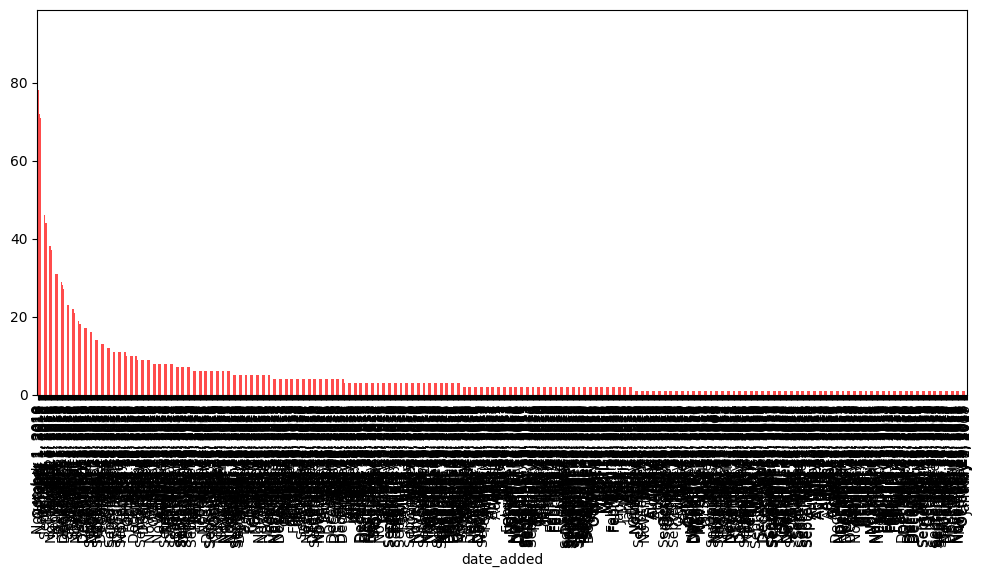

In [129]:
Netflix_Data['date_added'].value_counts().plot(kind='bar', figsize=(12, 5), color='red', alpha=0.7)

- ¿En qué años se lanzaron más películas o series?